<a href="https://colab.research.google.com/github/rafaelarruda/PatrimonioUniao/blob/main/Patrimonio_da_uniao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patrimônio da União

**URL: http://repositorio.dados.gov.br/seges/raio-x/patrimonio-uniao.csv**

**Esta seção se propõe a demonstrar, por meio de indicadores e gráficos, dados quantitativos e qualitativos dos imóveis de uso especial da União, ou seja, que se destinam à execução de serviços administrativos ou à prestação de serviços públicos em geral, tais como prédios de repartições públicas.**

Os dados apresentados não incluem os chamados imóveis dominiais — que não são ocupados pela Administração Pública — mas sim cedidos a terceiros por meio de instrumentos de regularização fundiária, tais como aforamentos, Concessões de Direito Real de Uso (CDRU), e Concessão de Uso Especial para fins de Moradia (CUEM). Os dados apresentados não incluem os bens de uso comum do povo — aqueles necessários à coletividade como, por exemplo, os rios, as praças, as vias públicas e as praias.

**Alterações recentes**

Atualizado em 24/09/2021

# Imports

In [ ]:
# Tratamento de dados
import pandas as pd
import statistics as sts
import seaborn as srn
import numpy as np

# Tratamento de dados

**Lendo e visualizando arquivos**

In [ ]:
pat = pd.read_csv('patrimonio-uniao.csv')
pat.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,regime_utilizacao,tipo_destinacao,tipo_imovel,endereco,municipio_nome,municipio_cod_ibge,uf,metro_quadrado_area,metro_quadrado_construida,valor_imovel,valor_aluguel
0,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - ADMINISTRAÇÃO FEDERAL INDIRETA,Porto,Terreno,R REPUBLICA DO EQUADOR s/nº Confronta Com a Ru...,SANTOS,3548500,SP,956.75,NaN,3370000.00,0.0
1,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - OUTROS,Edifício / Prédio,Casa,ETA João Batista de Almeida s/n,DIAMANTINO,5103502,MT,820.00,22.08,72796.98,0.0
2,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,Açude,FAZ Dona Justa (Pitomba) s/n Corpo Hídrico UHE...,MORADA NOVA DE MINAS,3143500,MG,52040.00,NaN,52040.00,0.0
3,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,Açude,RCH Manezim s/n UHE Cachoeira Dourada,CACHOEIRA DOURADA,3109808,MG,37360.00,NaN,37360.00,0.0
4,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Edifício / Prédio,Edifício / Prédio,AV Antonio Bismark s/n,PRAINHA,1506005,PA,1200.00,246.85,69790.05,0.0


**Excluir as colunas por nome**

In [ ]:
pat.drop('tipo_imovel',axis=1, inplace=True)

In [ ]:
pat.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,regime_utilizacao,tipo_destinacao,endereco,municipio_nome,municipio_cod_ibge,uf,metro_quadrado_area,metro_quadrado_construida,valor_imovel,valor_aluguel
0,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - ADMINISTRAÇÃO FEDERAL INDIRETA,Porto,R REPUBLICA DO EQUADOR s/nº Confronta Com a Ru...,SANTOS,3548500,SP,956.75,NaN,3370000.00,0.0
1,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - OUTROS,Edifício / Prédio,ETA João Batista de Almeida s/n,DIAMANTINO,5103502,MT,820.00,22.08,72796.98,0.0
2,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,FAZ Dona Justa (Pitomba) s/n Corpo Hídrico UHE...,MORADA NOVA DE MINAS,3143500,MG,52040.00,NaN,52040.00,0.0
3,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,RCH Manezim s/n UHE Cachoeira Dourada,CACHOEIRA DOURADA,3109808,MG,37360.00,NaN,37360.00,0.0
4,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Edifício / Prédio,AV Antonio Bismark s/n,PRAINHA,1506005,PA,1200.00,246.85,69790.05,0.0


**Mudar os nomes da tabela para melhor visualização das mesmas**

In [ ]:
pat.rename(columns={'orgao_superior_codigo_siorg':'codigo','orgao_superior_nome':'orgao',
                    'orgao_superior_sigla':'sigla','ano_mes_referencia':'mes_ref',
                    'regime_utilizacao':'regime', 'tipo_destinacao':'destinacao',
                    'municipio_nome':'municipio'}, inplace=True)

pat.head()

,codigo,orgao,sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,mes_ref,regime,destinacao,endereco,municipio,municipio_cod_ibge,uf,metro_quadrado_area,metro_quadrado_construida,valor_imovel,valor_aluguel
0,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - ADMINISTRAÇÃO FEDERAL INDIRETA,Porto,R REPUBLICA DO EQUADOR s/nº Confronta Com a Ru...,SANTOS,3548500,SP,956.75,NaN,3370000.00,0.0
1,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - OUTROS,Edifício / Prédio,ETA João Batista de Almeida s/n,DIAMANTINO,5103502,MT,820.00,22.08,72796.98,0.0
2,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,FAZ Dona Justa (Pitomba) s/n Corpo Hídrico UHE...,MORADA NOVA DE MINAS,3143500,MG,52040.00,NaN,52040.00,0.0
3,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,RCH Manezim s/n UHE Cachoeira Dourada,CACHOEIRA DOURADA,3109808,MG,37360.00,NaN,37360.00,0.0
4,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Edifício / Prédio,AV Antonio Bismark s/n,PRAINHA,1506005,PA,1200.00,246.85,69790.05,0.0


**Quantidade de linhas e colunas**

In [ ]:
pat.shape

(54695, 19)

**Agrupar os dados**

Quantidade de imóveis por órgão


In [ ]:
agrupar = pat.groupby(['orgao']).size()
agrupar

orgao
ADVOCACIA-GERAL DA UNIÃO                                     157
CONTROLADORIA-GERAL DA UNIÃO                                  19
MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECIMENTO        10944
MINISTÉRIO DA CIDADANIA                                        7
MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E INOVAÇÕES                 80
MINISTÉRIO DA DEFESA                                       11557
MINISTÉRIO DA ECONOMIA                                     18717
MINISTÉRIO DA EDUCAÇÃO                                      6233
MINISTÉRIO DA INFRAESTRUTURA                                1135
MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA                   1582
MINISTÉRIO DA MULHER, DA FAMÍLIA E DOS DIREITOS HUMANOS        8
MINISTÉRIO DA SAÚDE                                         1467
MINISTÉRIO DAS RELAÇÕES EXTERIORES                           171
MINISTÉRIO DE MINAS E ENERGIA                                 63
MINISTÉRIO DO DESENVOLVIMENTO REGIONAL                       849
MINISTÉRIO DO MEIO 

**Agrupar os dados **



In [ ]:
agrupar2= pat.groupby(['destinacao', 'orgao']).size()
agrupar2

destinacao  orgao                                    
Aeroporto   MINISTÉRIO DA DEFESA                          166
            MINISTÉRIO DA ECONOMIA                       2633
            MINISTÉRIO DA INFRAESTRUTURA                   37
            MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA       1
Aeródromo   MINISTÉRIO DA DEFESA                           17
                                                         ... 
Usina       MINISTÉRIO DA DEFESA                            1
            MINISTÉRIO DA ECONOMIA                         21
            MINISTÉRIO DA EDUCAÇÃO                          1
Via Férrea  MINISTÉRIO DA ECONOMIA                         17
            MINISTÉRIO DA INFRAESTRUTURA                    5
Length: 386, dtype: int64

**Verificar nulos e somar**

In [ ]:
pat.isnull().sum()

codigo                           0
orgao                            0
sigla                            0
orgao_codigo_siorg               0
orgao_nome                       0
orgao_sigla                      0
orgao_como_no_raiox_nome         0
orgao_como_no_raiox_sigla        0
mes_ref                          0
regime                           0
destinacao                       0
endereco                         0
municipio                        0
municipio_cod_ibge               0
uf                               0
metro_quadrado_area              0
metro_quadrado_construida    22387
valor_imovel                     0
valor_aluguel                    0
dtype: int64

**Correção de erros achados na analise acima**

In [ ]:
pat['metro_quadrado_construida'].describe()

count    3.230800e+04
mean     3.343478e+09
std      4.248622e+11
min      0.000000e+00
25%      1.000000e+02
50%      1.820000e+02
75%      5.742350e+02
max      5.400018e+13
Name: metro_quadrado_construida, dtype: float64

**Calcular a mediana**

In [ ]:
mediana = sts.median(pat['metro_quadrado_construida'])
mediana

154.81

**Substituir o valor NaN pela mediana**

In [ ]:
pat['metro_quadrado_construida'].fillna(mediana, inplace=True)

**verificando novamente os null**

In [ ]:
pat.isnull().sum()

codigo                       0
orgao                        0
sigla                        0
orgao_codigo_siorg           0
orgao_nome                   0
orgao_sigla                  0
orgao_como_no_raiox_nome     0
orgao_como_no_raiox_sigla    0
mes_ref                      0
regime                       0
destinacao                   0
endereco                     0
municipio                    0
municipio_cod_ibge           0
uf                           0
metro_quadrado_area          0
metro_quadrado_construida    0
valor_imovel                 0
valor_aluguel                0
dtype: int64

**Tirando a mediana do aluguel**

In [ ]:
mediana = sts.median(pat['valor_aluguel'])
mediana

0.0

**substituir o valor NaN pela mediana**

In [ ]:
pat['valor_aluguel'].fillna(mediana, inplace=True)

In [ ]:
pat.isnull().sum()

codigo                       0
orgao                        0
sigla                        0
orgao_codigo_siorg           0
orgao_nome                   0
orgao_sigla                  0
orgao_como_no_raiox_nome     0
orgao_como_no_raiox_sigla    0
mes_ref                      0
regime                       0
destinacao                   0
endereco                     0
municipio                    0
municipio_cod_ibge           0
uf                           0
metro_quadrado_area          0
metro_quadrado_construida    0
valor_imovel                 0
valor_aluguel                0
dtype: int64

*Quantidade de imóveis por órgão* 

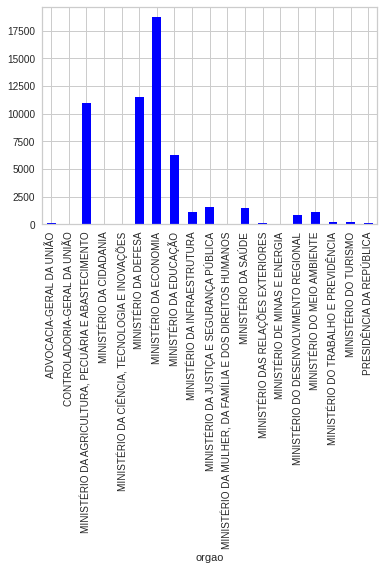

In [ ]:
agrupar.plot.bar(color='blue')

**AMOSTRAGEM SIMPLES**

In [ ]:
pat.head()

,codigo,orgao,sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,mes_ref,regime,destinacao,endereco,municipio,municipio_cod_ibge,uf,metro_quadrado_area,metro_quadrado_construida,valor_imovel,valor_aluguel
0,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - ADMINISTRAÇÃO FEDERAL INDIRETA,Porto,R REPUBLICA DO EQUADOR s/nº Confronta Com a Ru...,SANTOS,3548500,SP,956.75,154.81,3370000.00,0.0
1,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,CESSÃO - OUTROS,Edifício / Prédio,ETA João Batista de Almeida s/n,DIAMANTINO,5103502,MT,820.00,22.08,72796.98,0.0
2,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,FAZ Dona Justa (Pitomba) s/n Corpo Hídrico UHE...,MORADA NOVA DE MINAS,3143500,MG,52040.00,154.81,52040.00,0.0
3,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Açude,RCH Manezim s/n UHE Cachoeira Dourada,CACHOEIRA DOURADA,3109808,MG,37360.00,154.81,37360.00,0.0
4,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202203,EM REGULARIZAÇÃO - CESSÃO,Edifício / Prédio,AV Antonio Bismark s/n,PRAINHA,1506005,PA,1200.00,246.85,69790.05,0.0


In [ ]:
agrupar3 = pat.groupby(['valor_imovel']).size()
agrupar3

valor_imovel
0.000000e+00    1027
1.000000e-02      13
1.000000e+00      10
1.250000e+00       1
2.000000e+00       1
                ... 
1.418156e+10       1
2.068923e+10       1
4.771466e+10       1
1.013155e+11       1
1.552513e+11       6
Length: 36741, dtype: int64

In [ ]:
pat.shape

(54695, 19)

In [ ]:
np.random.seed(2345)
amostras = np.random.choice(a=[0,1],size=1000, replace=True,
                            p = [0.7,0.3])
len(amostras)

1000

In [ ]:
amostras

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,